# Bayesian methods for machine learning - Week 1

In [35]:
import matplotlib.pyplot as plt
from scipy.stats import (
    gamma,
    beta
)
import numpy as np

## Bayesian inference problems for MAP

Recall Bayes allows to get posterior:

$$
P(\theta, X) = \frac{P(X|\theta)P(\theta)}{P(X)}
$$

- $P(X|\theta)$, likelihood, which is determined by the model.
- $P(\theta)$, prior, which depends on the distribution of our choice.
- $P(X)$, evidence, which is determined by the data.

In the next subsections, we are going to present several problems that MAP computation may arise.

### Unfeasible to compute evidence

Usually, the *evidence*, which is the generating distribution of the data is unknown and very difficult to compute (e.g. image a classification problem where inputs are people portraits).

Instead of computing the posterior, one common approach is to compute the Maximum a Posterior (MAP), which is the point in the parameter space $\theta$ that maximizes the posterior probability:

$$
\begin{align*}
\hat{\theta}_{MAP} & = \underset{\theta}{\mathrm{argmax}} P(\theta|X) \\
                   & = \underset{\theta}{\mathrm{argmax}} \frac{P(X|\theta)P(\theta)}{P(X)}
\end{align*}
$$

As evidence is a constant that does not depend on $\theta$, we can write:

$$
\hat{\theta}_{MAP} = \underset{\theta}{\mathrm{argmax}} \frac{P(X|\theta)P(\theta)}{P(X)} \propto P(X|\theta)P(\theta)
$$

So maximizing the posterior probability, in terms of $\theta$, is equivalent to maximizing the product of the likelihood and the prior:

$$
\hat{\theta}_{MAP} = \underset{\theta}{\mathrm{argmax}} P(X|\theta)P(\theta)
$$

Therefore, **after removing the evidence from the optimization problem, it gets easier to solve**.

### Not invariant to reparametrization

To understand that the fact that the MAP is not invariant to reparametrization is a problem, we must understand first the difference between the Maximum a Posteriori (MAP) and the Maximum Likelihood Estimate (MLE).

While we have already presented MAP above, the MLE is a subtype where we assume the prior probability of the parameters is uniform (i.e. all parameter values are equally feasible). Therefore, computing the MLE is the same as computing the point in parameter space where the likelihood function has a maximum:

$$
\hat{\theta}_{MLE} = P(X|\theta)
$$

Note that likelihood:

- Is a function.
- Is a probability density function over the space of the data.
- No constraints applied on the integral over all parameter values (they do not need to sum to one).

However, the posterior probability needs to ensure that the integral over all data values do sum to one, as it is a probability distribution. Therefore, any non-linear map to the applied to the function due to reparametrization of the prior distribution, can change the location of the mode (i.e. MAP). For a more visual explanation, see this image, extracted from [this slides](http://www.robots.ox.ac.uk/~az/lectures/est/lect34.pdf):

![](images/reparametrization_problem.png)

More detailed explanations on this problem can be found in the following links:

- https://math.stackexchange.com/questions/2318467/why-are-map-estimators-not-invariant-under-reparameterization-while-mles-are
- https://www.coursera.org/learn/bayesian-methods-in-machine-learning/discussions/weeks/1/threads/s--xSe7eEeeVUgpJ_g7RbA
- https://zhiyzuo.github.io/MLE-vs-MAP/
- https://math.stackexchange.com/questions/2318467/why-are-map-estimators-not-invariant-under-reparameterization-while-mles-are

### Can't use as prior in next step

Let's use a specific prior to illustrate an example. 

Recall the probability density of the Delta Dirac distribution is:

$$
\delta(x - a) = \begin{cases}
+\infty & x = a \\
0 & otherwise
\end{cases}
$$

It must be satisfied that:

$$
\int P_{t-1}(\theta) d\theta = 1
$$

We model prior $P_{t-1}(\theta) \sim \delta(\theta - \theta_{MAP})$:

$$
P_{t-1}(\theta) = \begin{cases}
+\infty &\theta = \theta_{MAP} \\
0 & otherwise
\end{cases}
$$

Given posterior is used as the new prior at step $t$:

$$
\begin{align*}
P_t(\theta|x) & = \frac{P(x_t|\theta)P_{t-1}(\theta|x)}{P(x_t)} \\
              & = \frac{P(x_t|\theta)\delta(\theta - \theta_{MAP})}{P(x_t)} \\
              & = \delta(\theta - \theta_{MAP})
\end{align*}
$$


Note that the

- Prior $P_{t-1}(\theta)$ will force posterior for values of $\theta$ which are different from $\theta_{MAP}$ to be zero.
- Posterior at $\theta$ at $\theta_{MAP}$ will be the product of infinity and a constant, which is also infinity.


Therefore:

$$
P_{t}(\theta) = \begin{cases}
+\infty &\theta = \theta_{MAP} \\
0 & otherwise
\end{cases}
$$

$$
\int P_{t}(\theta) d\theta = 1
$$

And the posterior will remain unchanged. So **we do not get any additional information after using the posterior as the new prior**.

Example inspired from reply in [this forum post](https://www.coursera.org/learn/bayesian-methods-in-machine-learning/discussions/weeks/1/threads/Hflx7slrEeeeOhJiLYCq3g).

###  No confidence interval provided

Note that once we compute the $\theta_{MAP}$, we do not know which is the confidence interval it lies on.

### It can be an "untypical point"

Note that the proposed MAP can be reinterpreted as the solution to the following optimization problem:

$$
\theta_{MAP} = \underset{\theta}{\mathrm{argmin}} \ \unicode{x1D7D9}[\theta \neq \theta_{MAP}]
$$

Where $\theta_{MAP}$ is mode of the posterior. This point can be any points in the parameter space 

Other point estimates could be proposed depending on which metric we want to extract from the posterior:

- Mean of the posterior:

$$
\theta_{MEAN} = \underset{\theta}{\mathrm{argmin}} \ E(\theta - \theta_{MAP})^2
$$

- Median of the posterior:

$$
\theta_{MEDIAN} = \underset{\theta}{\mathrm{argmin}} \ E|\theta - \theta_{MAP}|
$$

However, in these cases, we would need to estimate the *evidence* in the posterior, which is something we want to avoid. 

## Conjugate distributions

Conjugate distributions are an additional approach to avoid computing the *evidence* term in the posterior formula.

Prior $P(\theta)$ is a **conjugate** to the likelihood $P(X|\theta)$ if the **prior and the posterior** $P(\theta|X)$ belong to the **same family of probability distributions**.

### Example 1

We have:

$$
P(\theta, X) = \frac{P(X|\theta)P(\theta)}{P(X)}
$$

Imagine that likelihood follows a Normal distribution:

$$P(X|\theta) \sim \mathcal{N}(X|\theta, \sigma^2)$$

Let's choose a Normal distribution as the prior on $\theta$:

$$P(\theta) \sim \mathcal{N}(\theta|m, s^2)$$

Then posterior will be also normal, which means that **Normal distribution is the conjugate of the Normal distribution with respect to the mean**:

$$P(\theta|X) \sim \mathcal{N}(\theta|a, b^2)$$

Let's prove this specific example (i.e. $m = 0$, $s^2 = 1$, $\sigma^2=1$):

$$
\begin{align*}
P(\theta, X) & = \frac{P(X|\theta)P(\theta)}{P(X)} \\
             & = \frac{\mathcal{N}(X|\theta, 1)\mathcal{N}(\theta|0, 1)}{P(X)}
\end{align*}
$$

$$
\begin{align*}
P(\theta, X) \propto & \frac{1}{\sqrt{2\pi}} \mathrm{exp}\left[-\frac{1}{2}(x - \theta)^2\right] \frac{1}{\sqrt{2\pi}} \mathrm{exp}\left[-\frac{1}{2}\theta^2\right] \\
             \propto & \ \mathrm{exp}\left[-\frac{1}{2}(x - \theta)^2\right] \mathrm{exp}\left[-\frac{1}{2}\theta^2\right] \\
             \propto & \ \mathrm{exp}\left[-\frac{1}{2}\left(x^2 + 2\theta^2 - 2x\theta \right)\right] \\
             \propto & \ \mathrm{exp}\left[-\frac{x^2}{2} - \theta^2 + \theta x\right] \\
             \propto & \ \mathrm{exp}\left[-(\theta-\frac{x}{2})^2\right] \mathrm{exp}\left[-\frac{1}{2} x^2\right] \mathrm{exp}\left[\frac{1}{4} x^2\right]
\end{align*}
$$

As $\mathrm{exp}\left[-\frac{1}{2} x^2\right] \mathrm{exp}\left[\frac{1}{4} x^2\right]$ do not depend on $\theta$, we can finally write:

$$
P(\theta, X) \propto \mathrm{exp}\left[-(\theta-\frac{x}{2})^2\right]
$$

Note that this is the expression of:

$$
\mathcal{N}(\theta| \frac{x}{2}, \frac{1}{2})
$$

as:

$$
\begin{align*}
\mathcal{N}\left(\theta| \frac{x}{2}, \frac{1}{2}\right) =& \\
                                                         =& \frac{1}{\sigma \sqrt{2\pi}} \mathrm{exp}\left[-\frac{1}{2} \left(\frac{\theta - \frac{x}{2}}{\sigma}\right)^2\right] \\
                                                         =& \frac{\sqrt{2}}{\sqrt{2\pi}} \mathrm{exp}\left[-(\theta - \frac{x}{2})^2\right] \propto \mathrm{exp}\left[-(\theta-\frac{x}{2})^2\right]
\end{align*}
$$

## Example 2

**The Gamma distribution is the conjugate of the Normal distribution with respect to the precision**. Therefore, if we model likelihood as the Normal density function and we set a prior on the precision of the Normal distribution as a Gamma, we ensure the posterior distribution follows a Gamma distribution.

In a normal distribution, precision $\tau$ is the reciprocal of the variance:

$$
\gamma = \frac{1}{\sigma^2}
$$

The higher the precision, the lower the variance and the narrower the normal distribution is.

We can rewrite the normal distribution density with respect to the precision:

$$
\mathcal{N}(x|\mu, \gamma^{-1}) = \frac{\sqrt{\gamma}}{\sqrt{2\pi}} \mathrm{exp}\left[-\frac{\gamma}{2}(\mu - x)^2\right]
$$

If we express the normal probability density in terms of the precision:

$$
\mathcal{N}(x|\mu, \gamma^{-1}) \propto \gamma^{\frac{1}{2}} \mathrm{exp}\left[-\frac{\gamma}{2}(\mu - x)^2\right]
$$

Let's define our likelihood function as:

$$
P(X|\theta) \sim \mathcal{N}(x|\mu, \gamma^{-1}) \propto \gamma^{\frac{1}{2}} \mathrm{exp}\left[-\frac{\gamma}{2}(\mu - x)^2\right]
$$

If we define our prior as a Gamma in terms of the precision, we get:

$$
P(\gamma) = \frac{b^a}{\Gamma(a)} \gamma^{a - 1} \mathrm{exp}\left[-b\gamma\right] \propto \gamma^{a - 1} \mathrm{exp}\left[-b\gamma\right]
$$

Then we can compute posterior as:

$$
\begin{align*}
P(\gamma|x) \propto & \ P(x|\gamma)P(\gamma) \\
            \propto & \ \gamma^{\frac{1}{2}} \mathrm{exp}\left[-\frac{\gamma}{2}(\mu - x)^2\right] \gamma^{a - 1} \mathrm{exp}\left[-b\gamma\right] \\
            \propto & \ \gamma^{a + \frac{1}{2} - 1} \mathrm{exp}\left[-\gamma \left(b + \frac{1}{2} (\mu - x)^2 \right)\right]
\end{align*}
$$

So posterior follows Gamma distribution:

$$
P(\gamma|x) \sim \Gamma(a + \frac{1}{2}, b + \frac{(x - \mu)^2}{2})
$$

More info on the Gamma distribution in [this section](#extra)

The lecture proves tries to prove that the Gaussian distribution is not a conjugate of the Gaussian distribution with respect of the precision. However, this demonstration is not clear enough in the videos and has been omitted (though it would be valuable here).

### Example 3

The **Beta distribution is the conjugate of the Bernoulli distribution**. Therefore, if we model our likelihood as a Bernoulli distribution and we model the probability $p$ as a Beta distribution, the posterior is also a Beta.

Given a Bernoulli likelihood:

$$
P(X|\theta) = \theta^{N_1} (1 - \theta)^{N_0}
$$

Where $N_0$ is the number of positive outcomes of binary events $X = \{x_1, ..., x_N\}$ and $N_1 = N - N_0$.

We model $\theta$ as a Beta distribution:

$$P(\theta) \sim Beta(\theta|a, b) \propto \theta^{a-1} (1-\theta)^{b-1}$$

Then, we can compute posterior as:

$$
\begin{align*}
P(\theta|X) \propto & \ P(X|\theta) P(\theta) \\
            \propto & \ \theta^{N_1} (1 - \theta)^{N_0} \theta^{a-1} (1-\theta)^{b-1} \\
            \propto & \ \theta^{N_1 + a - 1} (1-\theta)^{N_0 + b - 1}
\end{align*}
$$

Then we confirm posterior can be modelled as Beta:

$$
P(\theta|X) \sim Beta(N_1 + a, N_0 + b)
$$

You can see a table relating likelihoods and their conjugates in [this table](https://en.wikipedia.org/wiki/Conjugate_prior).

## Distributions recap

### Gamma distribution

#### Description

Recall probability density function for Gamma distribution is:

$$
\Gamma(\gamma|a, b) = \frac{b^a}{\Gamma(a)} \gamma^{a - 1} \mathrm{exp}\left[-b\gamma\right]
$$

Where:

$$
\Gamma(n) = (n-1)!
$$

$a$ is the shape parameter and $b$ is the inverse scale parameter (i.e. $b = \frac{1}{\theta}$).

Note $\gamma$, $a$, $b$ are positive, as the distribution is a distribution over the positive axis. 

#### Statistics

- Expected value $\mathrm{E}[\gamma] = \frac{a}{b}$.
- Variance $\mathrm{Var}[\gamma] = \frac{a}{b^2}$.


#### Visualization

Let's see some examples using different parameters:

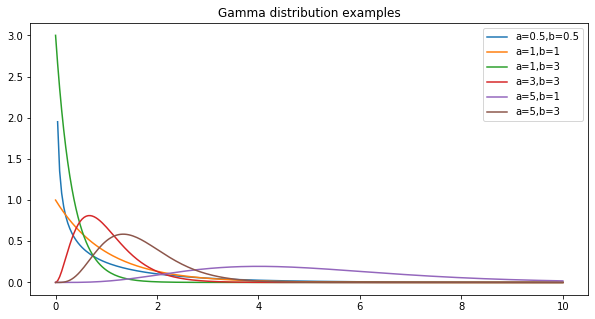

In [28]:
examples = [(0.5, 0.5), (1, 1), (1, 3), (3, 3), (5, 1), (5, 3)]
x = np.linspace(0, 10, num=250)

plt.figure(figsize=(10, 5))
for current_a, current_b in examples:
    plt.plot(x,
             gamma.pdf(x, a=current_a, scale=1/current_b),
             label=f'a={current_a},b={current_b}')
plt.legend()
plt.title('Gamma distribution examples');

We can see that Gamma functions resemble whether a unimodal distribution or an exponential decaying one.

#### Example

Let's present a "real life" example.

Image we run every day approximately 5 km (i.e. expected value), and that there is usually a deviation of 100 meters more or less (i.e. standard deviation, root of the variance). Note that Gaussian does not make sense here as we cannot run negative distances.

We define the likelihood function as Gamma distribution:

$$
P(x|\theta) \sim \Gamma(x|a, b)
$$

The maximum likelihood estimates for $a$ and $b$ given the information provided would be:

$$
\begin{cases}
\mathrm{Var}[\gamma] = \frac{a}{b^2} = 0.1^2 \\
\mathrm{E}[\gamma] = \frac{a}{b} = 5
\end{cases}
$$

Then

$$a_{MLE} = 2500, b_{MLE} = 500$$

If we plot this distribution, we get:

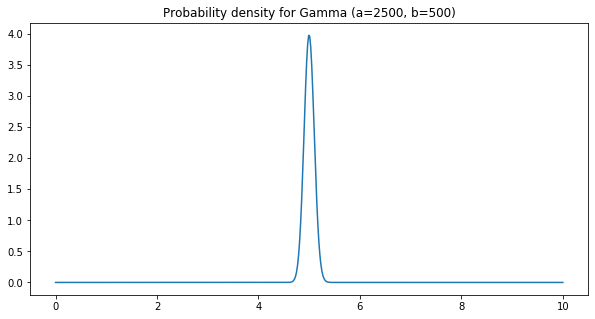

In [34]:
x = np.linspace(0, 10, num=500)

plt.figure(figsize=(10, 5))
plt.plot(x, gamma.pdf(x, a=2500, scale=1/500))
plt.title('Probability density for Gamma (a=2500, b=500)');

### Beta distribution

#### Description

Recall the Beta distribution:

$$
B(x|a, b) = \frac{1}{B(a,b)}x^{a-1} (1 - x)^{b-1}
$$

Where:

- $a > 0$, $b > 0$.
- $x \in [0,1]$.
- $B(a,b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$ where $\Gamma$ is the Gamma function described above.

#### Statistics

- $\mathrm{E} = \frac{a}{a+b}$.
- $\mathrm{Var} = \frac{av}{(a+b)^2(a+b-1)}$.

#### Visualization

Let's visualize Beta distribution for some values:

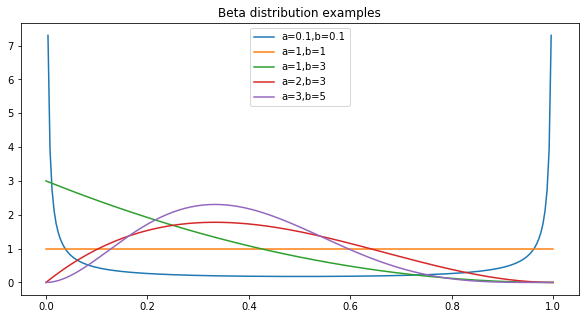

In [37]:
examples = [(0.1, 0.1), (1, 1), (1, 3), (2, 3), (3, 5)]

x = np.linspace(0, 1, num=250)

plt.figure(figsize=(10, 5))
for current_a, current_b in examples:
    plt.plot(x,
             beta.pdf(x, a=current_a, b=current_b),
             label=f'a={current_a},b={current_b}')
plt.legend()
plt.title('Beta distribution examples');

We can get a binomial distribution, U-shaped distribution or even the uniform distribution.

#### Example

We can use the Beta distribution to model the likelihood of the rank of our watched movies in IMDB, so our favorite movie is ranked with a $1$ and our least favorite movie is ranked with a $0$. As we score new movies, rank may variate.

Given the expected rank $\mathrm{E}[x]$ is 0.8 and $\mathrm{Var} = 0.1^2$, we can easily compute the maximum likelihood estimate for a and b:

$a = 12, b=3$

And we can plot the distribution:

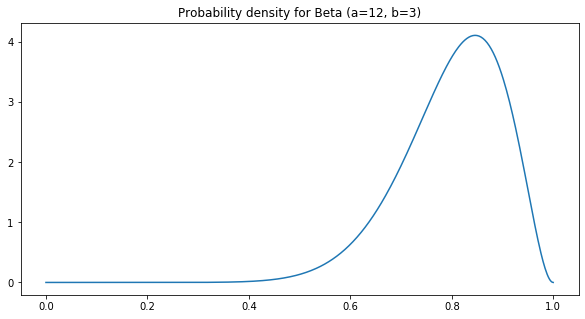

In [39]:
x = np.linspace(0, 1, num=500)

plt.figure(figsize=(10, 5))

plt.plot(x, beta.pdf(x, a=12, b=3))
plt.title('Probability density for Beta (a=12, b=3)');

## Non-parametric approaches for density estimation

If we do not choose proper densities, we will end up with a poor model, leading to bad predictive performance. An alternative would be to use non-parametric models, such as:

- Kernel density estimation. It is computed by placing a kernel (e.g. usually Gaussian) on each data point, add the contributions over all dataset and normalizing.
- K nearest neighbors.

## Conclusions

We have seen the following pros and cons for the maximum a posteriori (MAP):

| Pro               | Con                                         |
| ----------------  | ------------------------------------------  |
| Easy to compute   | May be an "unlikely" point                  |
|                   | Not invariant to parametrization            |
|                   | Provides no confidence interval             |
|                   | Can't be used as a prior in online learning |

On the other hand, we have seen the following pros and cons for the conjugate priors:

| Pro                             | Con                                         |
| ------------------------------- | ------------------------------------------  |
| Provides exact posterior        | Conjugate prior may not be adequate         |

Next lectures will present technique to compute or approximate posterior when prior does not allow computing an exact posterior.